<a href="https://colab.research.google.com/github/PVVaishnavi/LGMVIP-DataScience/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
columns=['Sepal length','Sepal width','Petal length','Petal width','Class_labels']

In [ ]:
iris=pd.read_csv('iris.data',names=columns)
iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class_labels  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


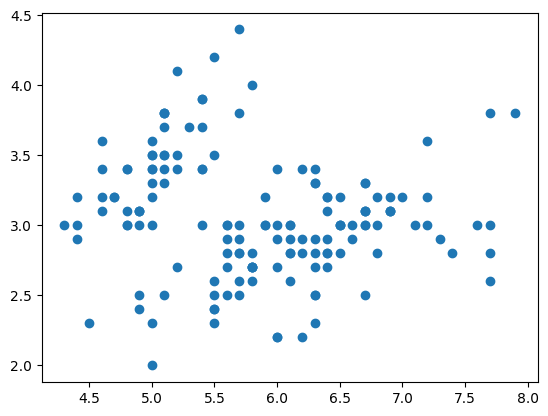

In [ ]:
plt.scatter(iris["Sepal length"],iris["Sepal width"])

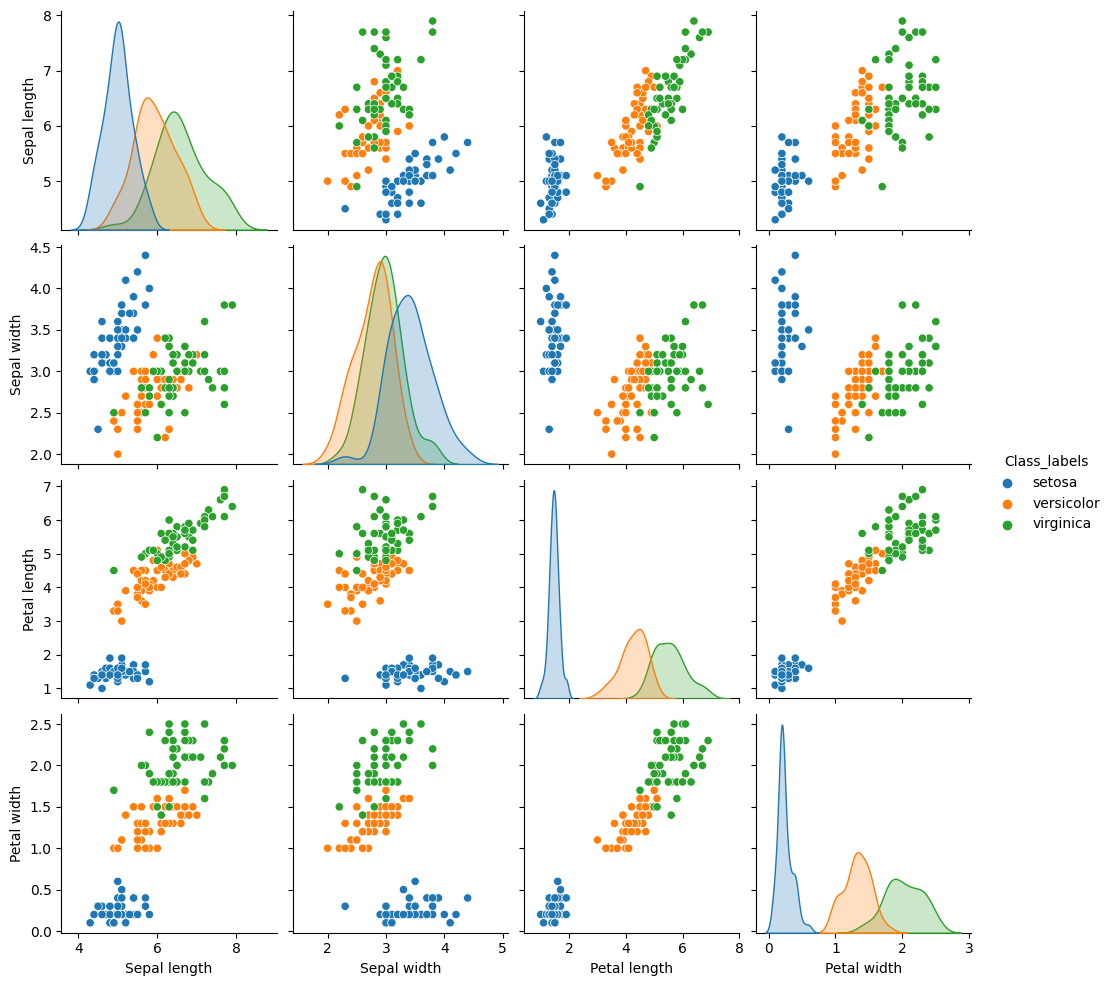

In [ ]:
sns.pairplot(iris, hue='Class_labels')

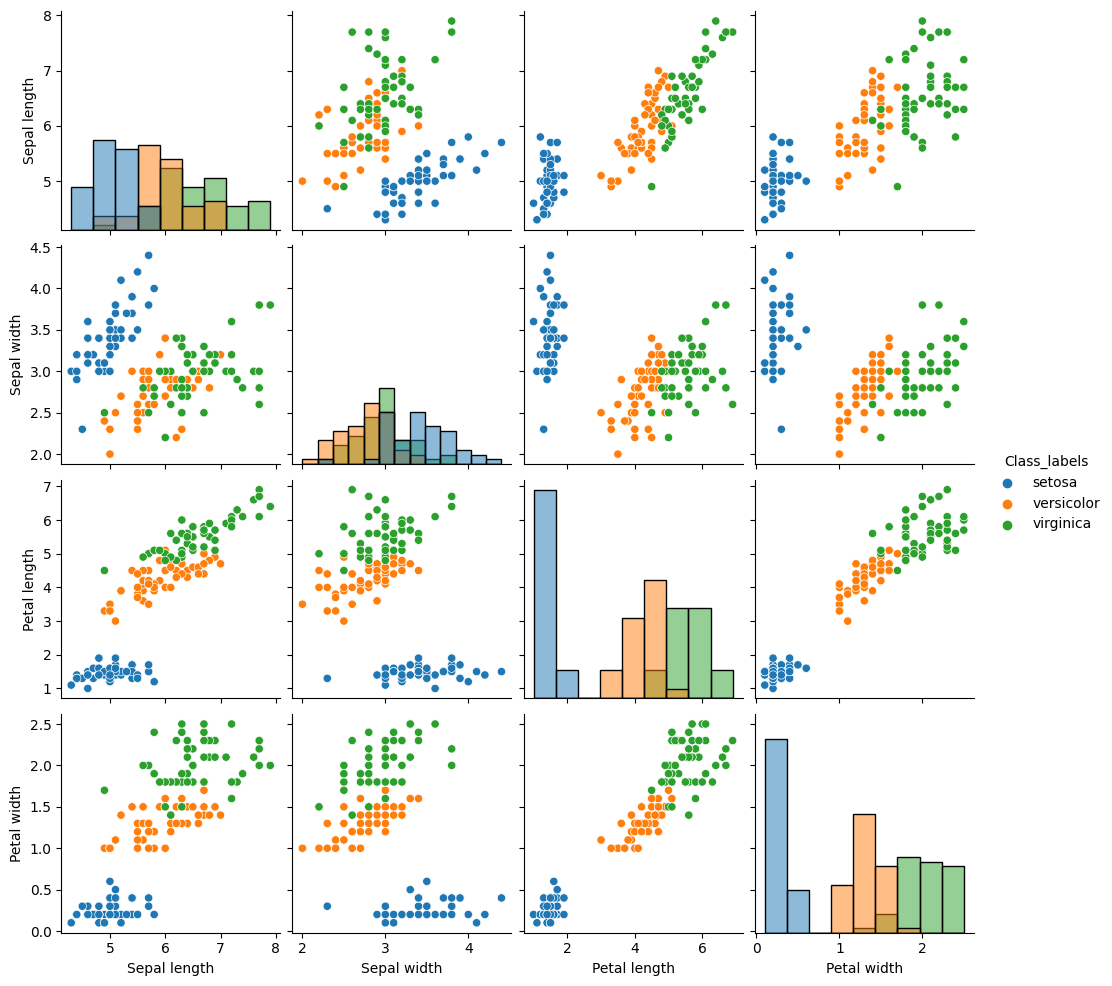

In [ ]:
sns.pairplot(iris, hue="Class_labels", diag_kind="hist")

In [ ]:
iris.corr()


<ipython-input-24-156dd03bc859>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-25-4c35d5e53803>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), cmap="RdPu")


<Axes: >

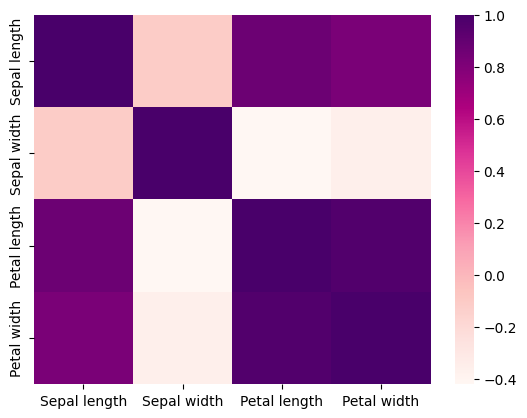

In [ ]:
sns.heatmap(iris.corr(), cmap="RdPu")

In [ ]:
target=iris['Class_labels']
df=iris.copy()
df=df.drop('Class_labels', axis=1)
df.shape


(150, 4)

In [ ]:
x=iris.iloc[:, [0,1,2,3]].values
LaEn=LabelEncoder()
iris['Class_labels']=LaEn.fit_transform(iris['Class_labels'])
y=iris['Class_labels'].values
iris.shape

(150, 5)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Trainging set:",x_train.shape)
print("Testing set:",x_test.shape)


Trainging set: (120, 4)
Testing set: (30, 4)


In [ ]:
d_tree=DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


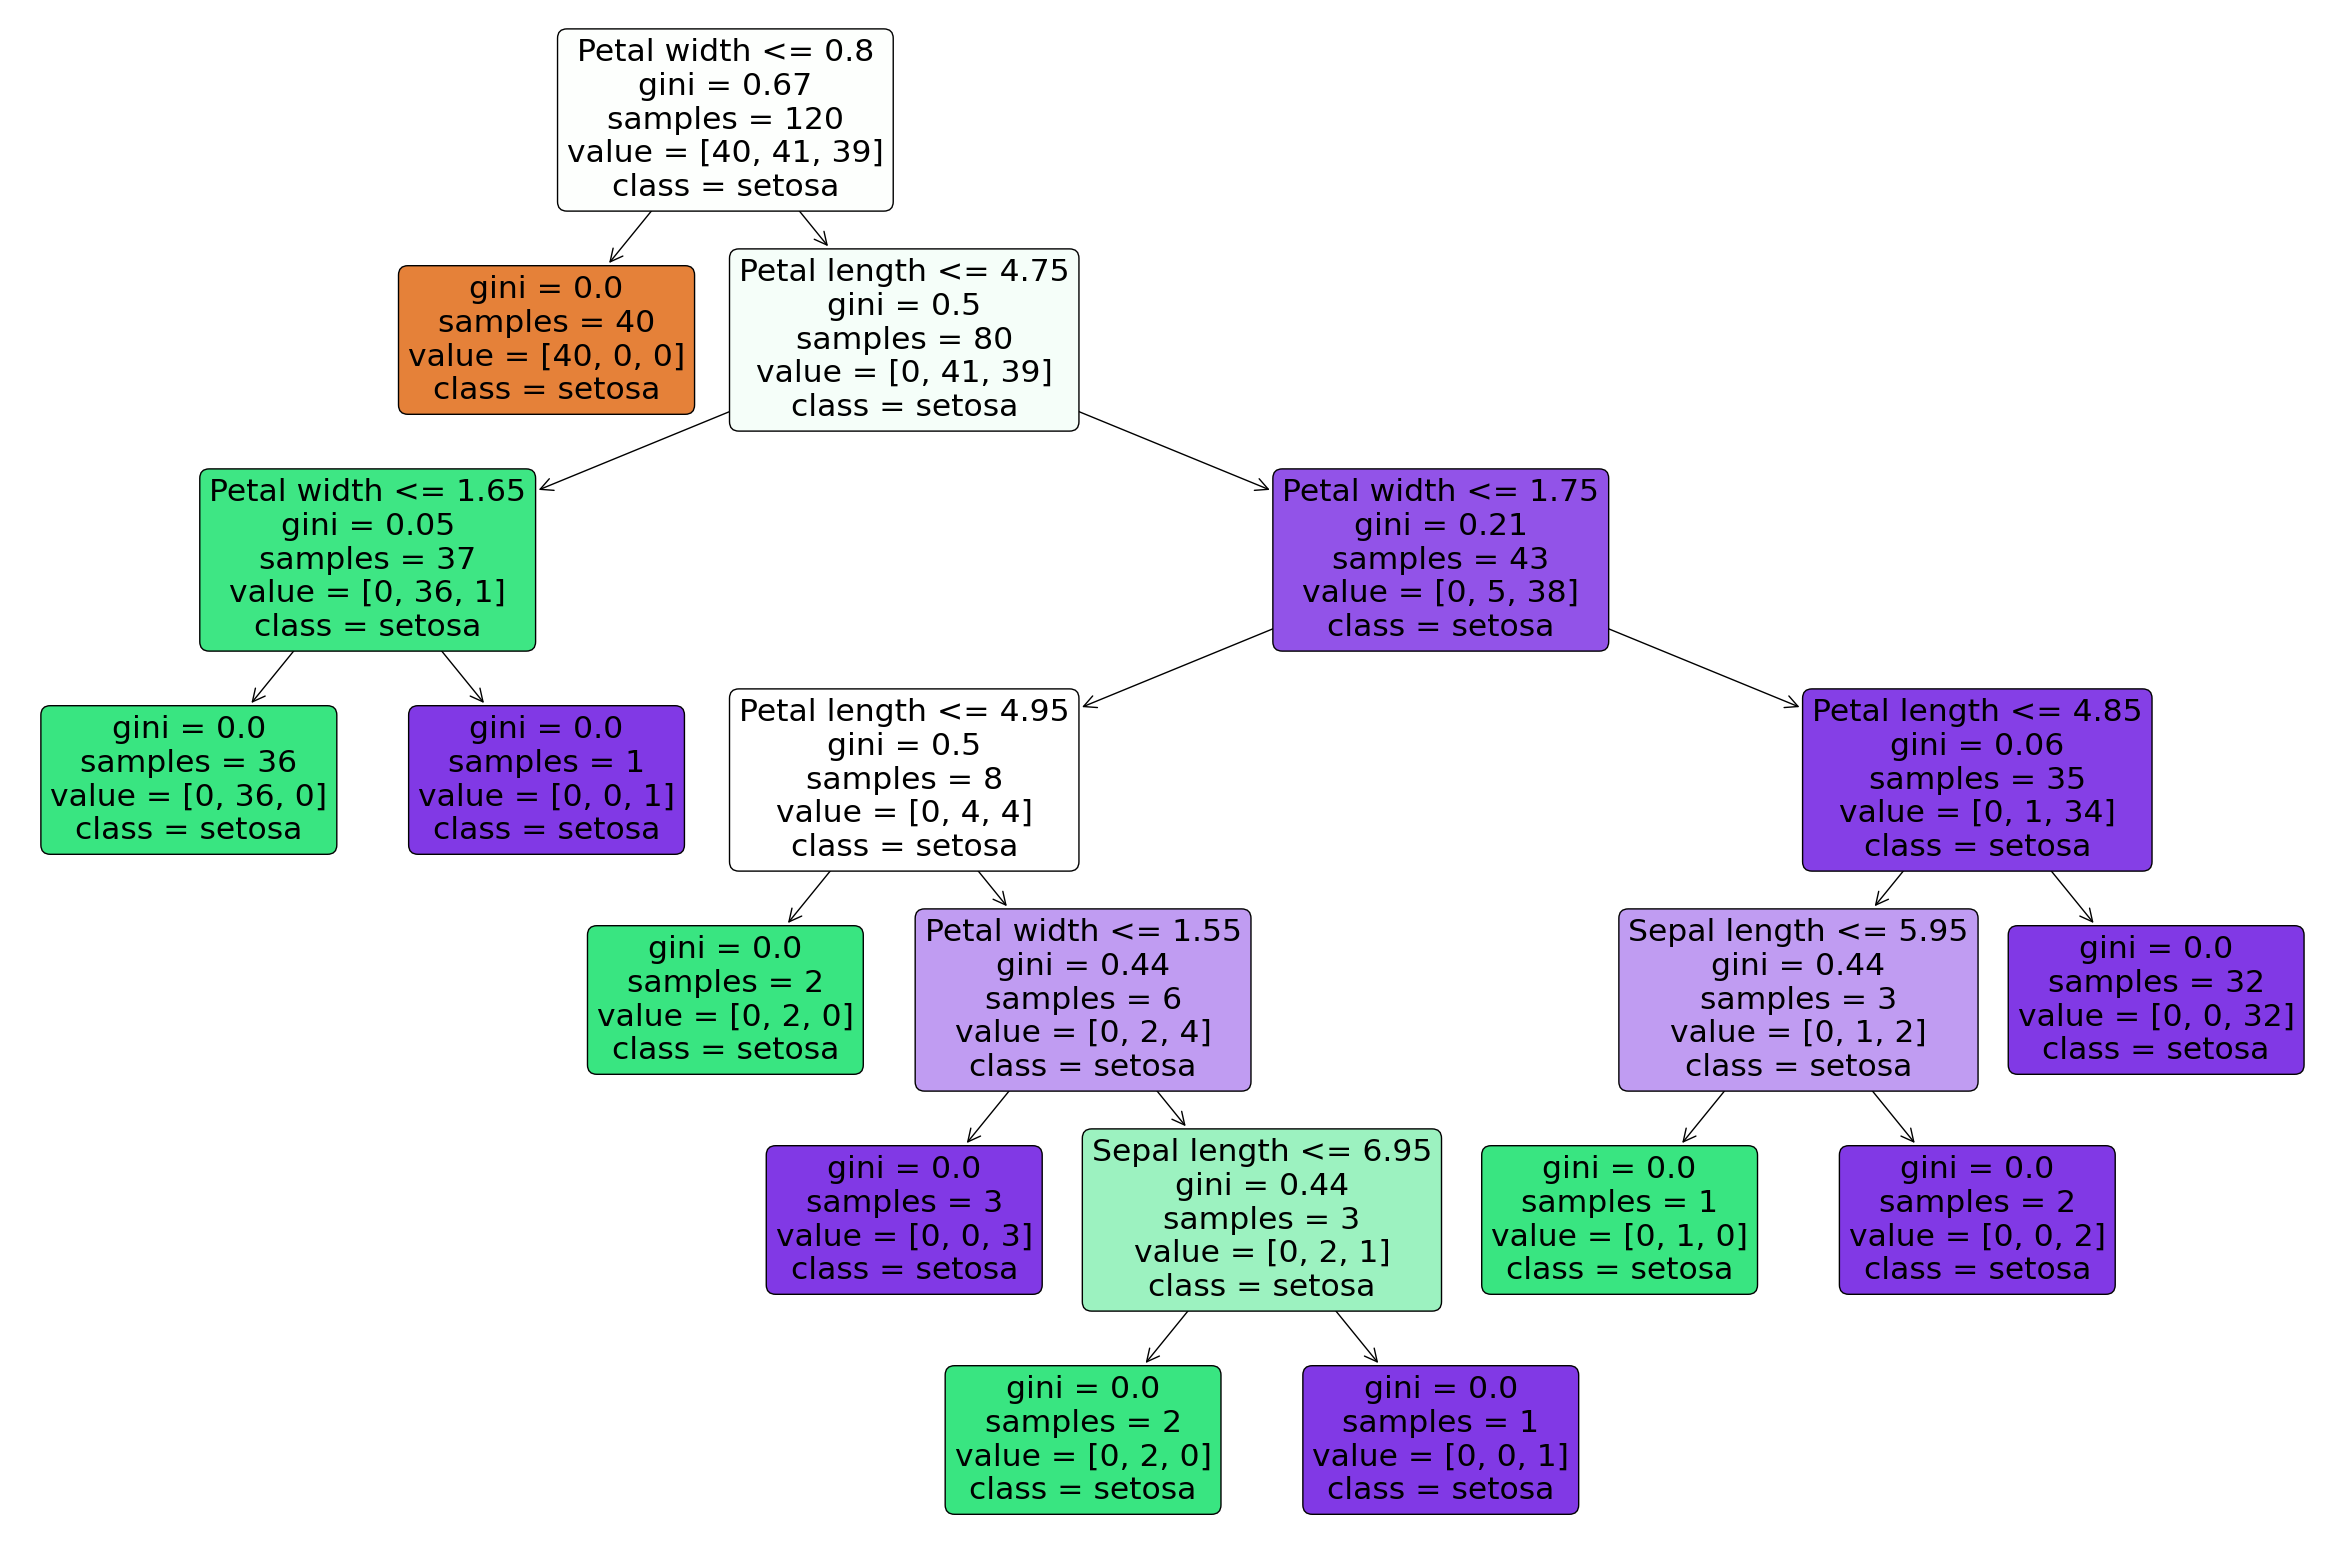

In [ ]:
plt.figure(figsize=(30,20))
tree=plot_tree(d_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)


In [ ]:
y_pred=d_tree.predict(x_test)
print("Classification Report:\n",classification_report(y_test,y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))


Accuracy: 1.0


In [ ]:
confusion_matrix(y_test,y_pred)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])